## Contents 

#### Optimizations in machine learning - 3 min
#### Finding out minima - 5 min

- least square 
- loss function 
- neural networks 

#### Partial Derivative- 3 min

#### Gradient Descent Algorithm - 2 min
- based on partial derivatives 



#### Methods of differentiations - 5 min
- symbolic method 
- numerical method 
- autodiff - backpropagation

#### Autodiff - backpropagation - 10 min
- method - computational graph
- do it yourself 
- pointing few properties out - child node, flow of derivatives

#### Making of the tiny beast - Value Object - OOP - 10 
- attributes and methods 
- plotting in the graph 

#### Optimizing for some convex function- 10 min
#### Implementing layers and neural networks - using value object 


In [ ]:
# this is an imitation of Andrej Karpathy lecture on his yourtube channel


#### Finding out minima - 5 min

- least square 
- loss function 
- neural networks 

In [166]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [167]:
def f(x):
    return 3*x**2 - 4*x + 5


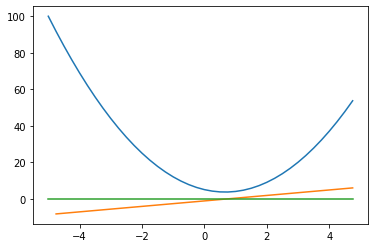

In [171]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.plot(xs[1:], np.diff(ys))
plt.plot(xs, np.zeros(xs.shape))


#### Partial Derivative- 3 min

- minima or maxima can be foud where first derivative is zero 
- this formalism can be extended to multidimentional funciton as well 

#### Gradient Descent Method 

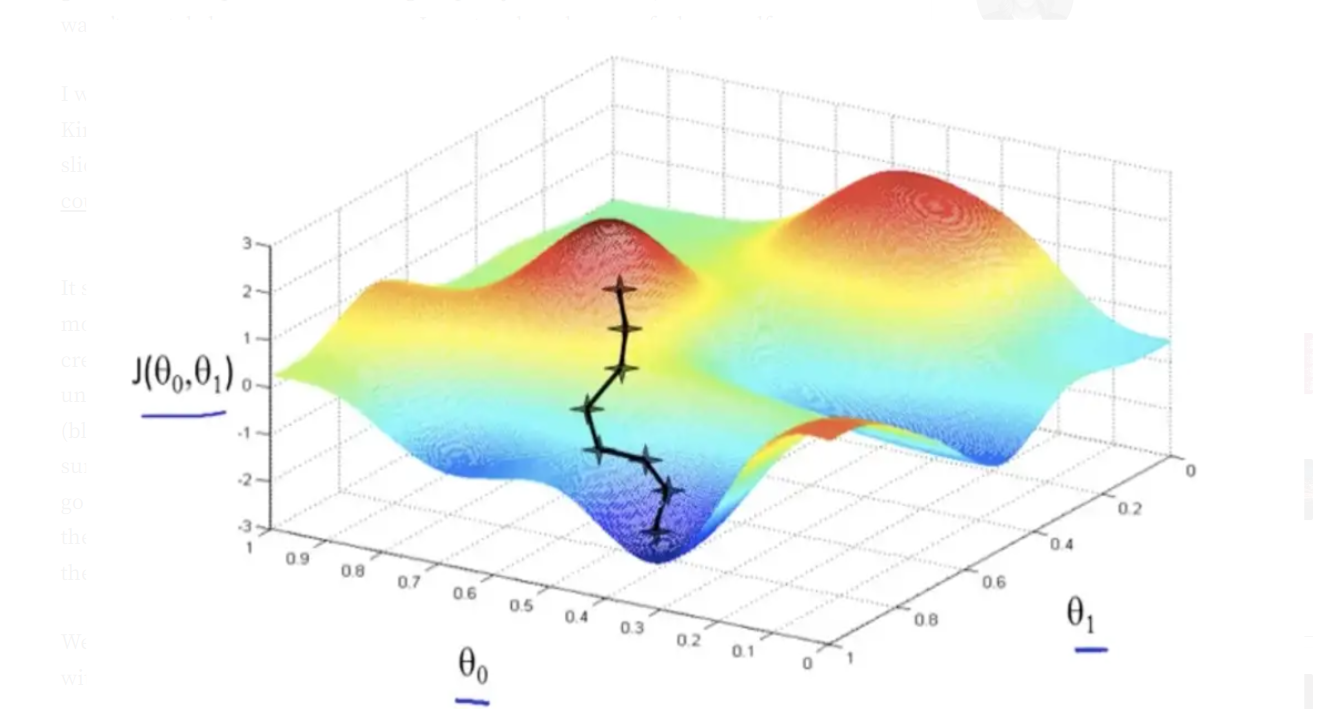



- require us to calculate partial derivatives of the loss function about each of parameters
- iterative method

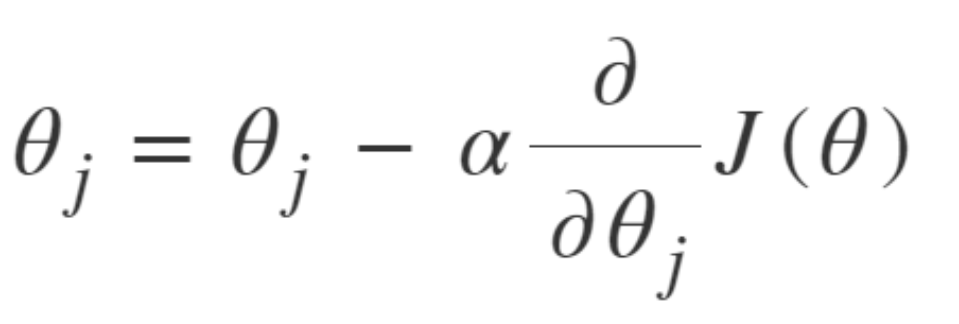




#### Methods of differentiations - 5 min
- symbolic method 
- numerical method 
- autodiff - backpropagation

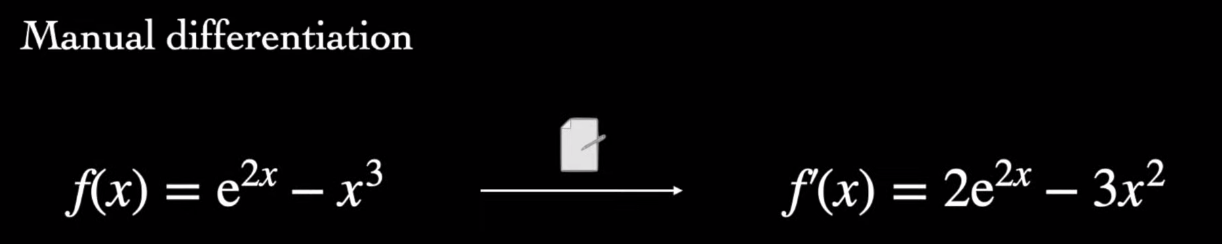

#### Numerical Method

- By fundamental definition of derivatives 
- accuracy depends on step size
- error propagates 
- floating point 
- rounding off error and truncation error

- time complexity


In [30]:

# one example with neumerical 


h = 0.0000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.000000010000001
slope 1.000000082740371


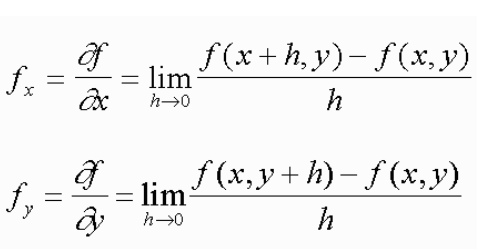


#### Autodiff - backpropagation - 10 min
- method - computational graph
- hands on 
- pointing few properties out - child node, flow of derivatives backward

### Autodiff - Reverse mode (backpropagation)
- Underlying functions are made up of primitive **binary operations** whose derivatives we know already 
- We can use **chain rule of calculus** to sail through complex function


##### Chain Rule
Consider the function

$ y=e^{\sin(x^{2})}$

This can be decomposed as the composite of three functions:

\begin{aligned}y&=f(u)=e^{u},\\[6pt]u&=g(v)=\sin v=\sin(x^{2}),\\[6pt]v&=h(x)=x^{2}.\end{aligned}

Their derivatives are:

$ \frac{dy}{dx} = \frac{dy}{du}\cdot\frac{du}{dv}\cdot\frac{dv}{dx}. $


The derivative function is therefore:

$ \frac {dy}{dx} = e^{\sin(x^{2})}\cdot \cos(x^{2})\cdot 2x. $

This can be extented to multivariate function as well 







Let us take this function 

$ f(x,y) = e^{x^2}+ x \cdot y $

### Observations 
- attributes and methods 

- data, gradient, children nodes (graph/tree structure),  
- label, operation names 
- local backpropagation, simple binary operations -- Methods


In [172]:

x = Value(0.3, label='x')
y = Value(-1.1, label='y')

u = x*y ; u.label = 'u'

x2= x**2; x2.label= 'x^2'
v =  x2.exp(); v.label = 'v'


f = u+v; f.label = 'f'


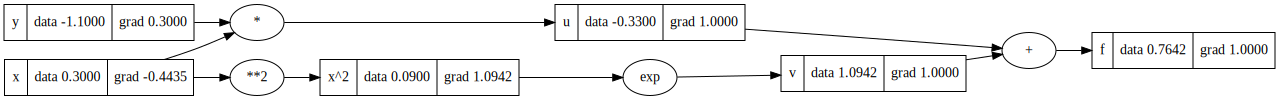

In [175]:
draw_dot(f)

In [77]:
f.grad = 1

f._backward()

v._backward()


In [174]:
f.backward()

In [176]:
def fun(x,y):
    return math.exp(x**2)+x*y
h=0.00000001

(fun(0.3+h, -1.1)- fun(0.3, -1.1))/h


# if this is so fast why we made huge computational graph to begin with  

-0.44349540706534185

In [ ]:
tensor 


#### Making of the tiny beast - Value Object - OOP - 10 min

- attributes and methods 

- data, gradient, children nodes (graph/tree structure),  
- label, operation names 
- local backpropagation, simple binary operations -- Methods

- plotting in the computational graph 

In [14]:
class Value:
    
  
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
    
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
    
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
  
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out
  
    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out
  
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad 
        out._backward = _backward

        return out

  
    def backward(self):
    
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()



In [24]:
# this is just to plot the computaion a

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
    # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [177]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

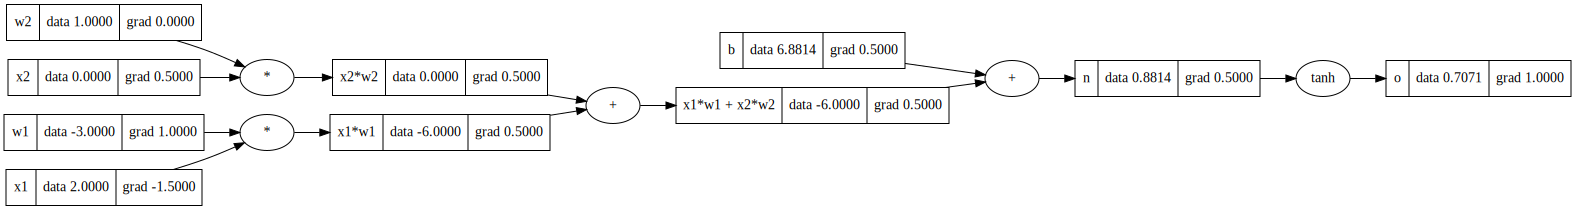

In [178]:
draw_dot(o)

#### Implementing layers and neural networks - using value object 

In [113]:
import random
class Neuron:
  
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

class Layer:
  
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [185]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
x = [2.0, 3.0, -1.0]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [204]:
nn = MLP(3, [4, 8, 1])
out = nn(x)

In [206]:

for k in range(50):
  
  # forward pass
    ypred = [nn(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
    for p in nn.parameters():
        p.grad = 0.0
    loss.backward()
  
  # update
    for p in nn.parameters():
        p.data += -0.1 * p.grad
  
    print(k, loss.data)
  

0 5.919993410222763
1 1.8414162549876651
2 4.342800703502447
3 2.8828967916230623
4 0.00038770727707570607
5 0.00038649022948942184
6 0.0003852810905150226
7 0.0003840797779152617
8 0.0003828862106584581
9 0.0003817003088957007
10 0.00038052199393838975
11 0.00037935118823648726
12 0.0003781878153570972
13 0.0003770317999636643
14 0.0003758830677956005
15 0.0003747415456483276
16 0.00037360716135386525
17 0.00037247984376177437
18 0.00037135952272058164
19 0.0003702461290595741
20 0.0003691395945710428
21 0.0003680398519929052
22 0.0003669468349916712
23 0.00036586047814586846
24 0.0003647807169297357
25 0.00036370748769735473
26 0.00036264072766705553
27 0.0003615803749062184
28 0.0003605263683163716
29 0.0003594786476186197
30 0.0003584371533393706
31 0.00035740182679639554
32 0.00035637261008513804
33 0.00035534944606537575
34 0.000354332278348097
35 0.00035332105128270744
36 0.00035231570994445475
37 0.00035131620012219107
38 0.00035032246830627177
39 0.00034933446167683145
40 0.00

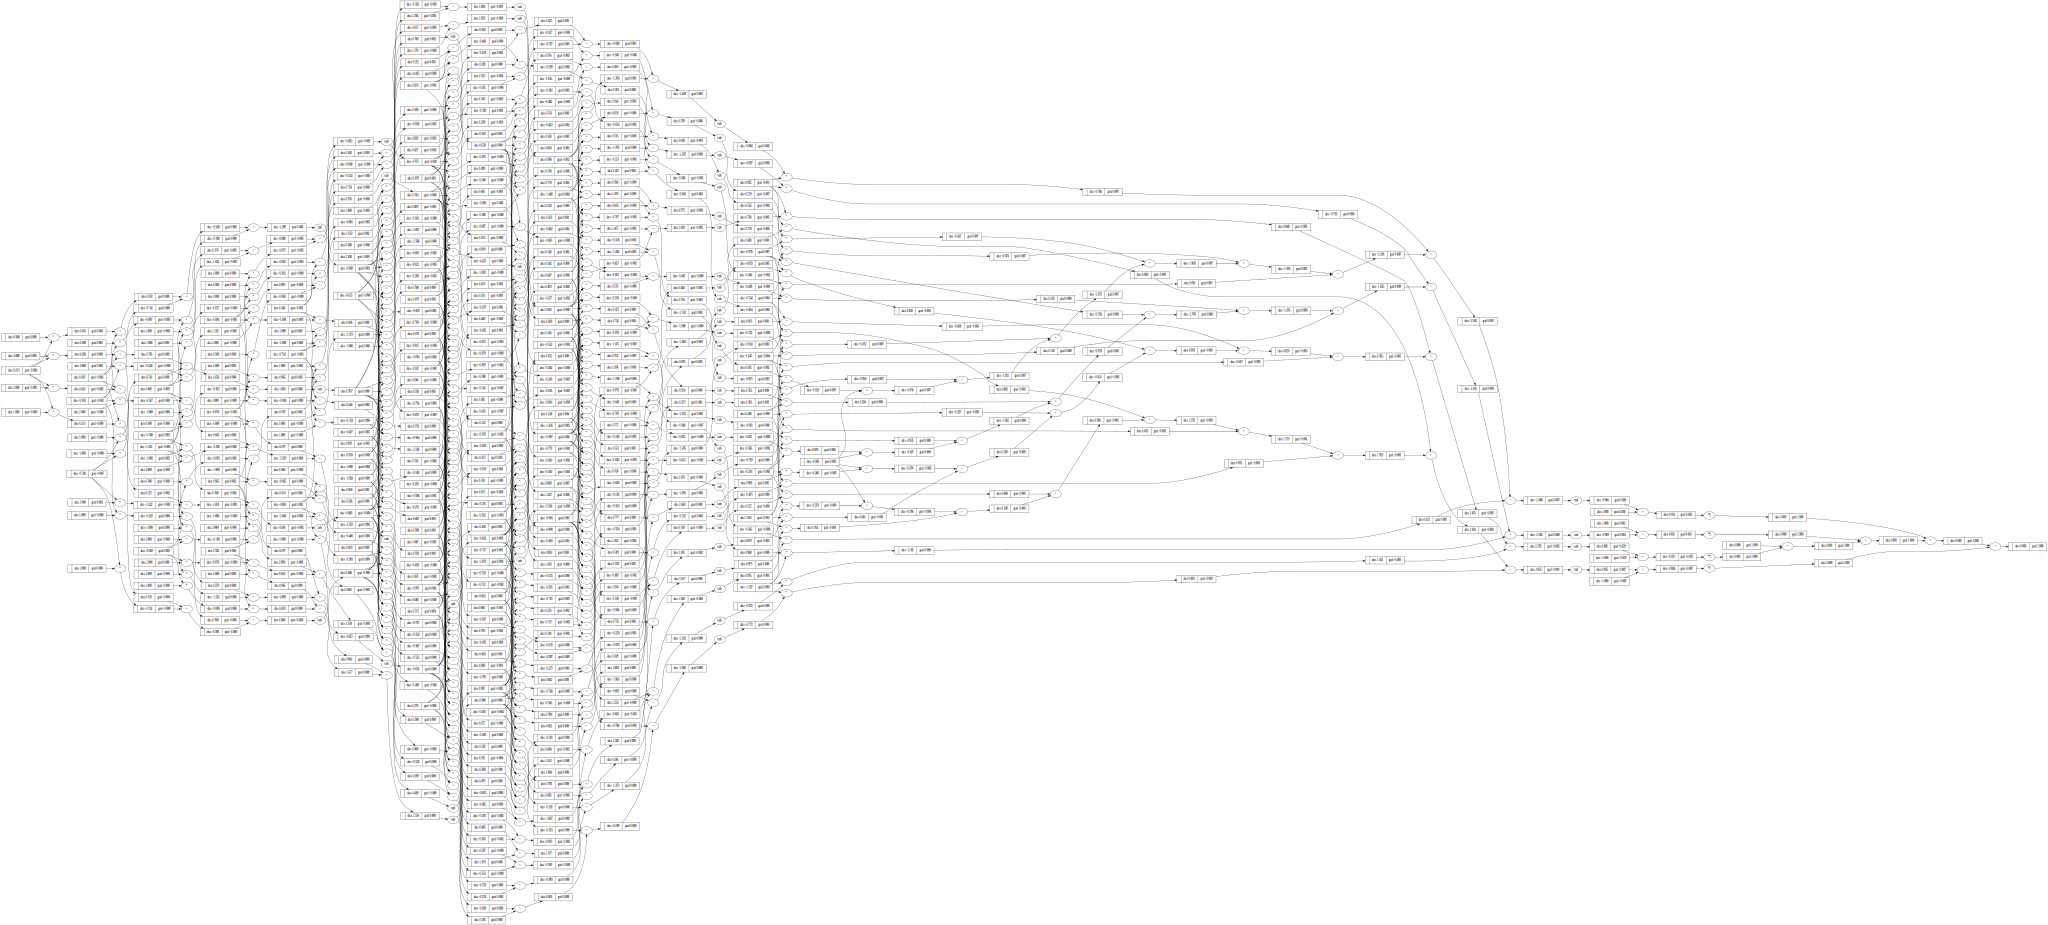

In [207]:
draw_dot(loss)

In [208]:
ys

[1.0, -1.0, -1.0, 1.0]

In [209]:
ypred

[Value(data=0.9885422442098784),
 Value(data=-0.9969257360723162),
 Value(data=-0.9865819587738993),
 Value(data=0.9956430475969924)]